# IE360 Assignment 1

Utku Boyar - 2018402144

# Introduction

The common point that brings the sub questions of this paper is the query that what sorts of relations inflation have. About what it does cause and what  it is caused by. The questions related to this are interesting for two reasons. Firstly, it is tempting to investigate the theoretical ideas from macroeconomics on real life data to see whether they hold or some other factors affect the outcomes. Secondly and more to the topic, Turkey is currently undergoing a relatively significant degree of inflation. So analyzing the effects of such a phenomenon is intriguing. 

Accordingly, the data from the EVDS platform of the Central Bank is obtained from five different measures, one of which is consumer price index (CPI) -being there as the main indicator of the inflation- and the others are the measurements that are purported to be correlated with the inflation. The first measurement other than CPI is the number of credit/debit card transactions in markets and shopping centers -carried by the "transactions" column of the dataset. The reason for the choice of this measurement is that this is an indicator of the amount of individual consumption. The number of transactions, rather than the amount is chosen to eliminate, to some extent, the effect of the changes in the prices. According to some, inflation and consumption are positively correlated as the former gives an incentive to consumers to buy now, instead of later. The second measure is USD/TRY exchange rates ("USD" column). The cost of many of the raw materials are somehow dependent on this rate, as transhipment of items and many of the raw materials are bought with USD. So a rise in USD/TRY rate is expected to increase the prices, hence positive correlation between the two. Another measure is the weighted average interest rates offered by banks for personal loans. This may be negatively correlated to consumption, as lower interest rates give more money to consumers to spend. However, the consumption data are from shopping malls and markets, somewhere people do not generally borrow money to spend in. This casts some doubt on the amount of correlation between the two measures. The last measure is the unemployment rate ("unemployment" column). This is thought to be negatively correlated with inflation.  

Later, another dataset is obtained from Google Trends, which is a measure for the number of search operations for certain words on Google search engine. The two words selected are "faiz oranı (interest rate)" and "dolar (USD/TRY exchange rate is meant)". They are expected to be positively correlated with not their corresponding measures themselves but sharp or unexpected changes in them.

Both data are sampled monthly from 2014 to 2022. There is no data collected for some measures in some slice of time. The convention used below for handling this missing data situation is dropping them. After the adjustments, the EVDS data are from March 2014 to February 2022, and the Google Trends data are from January 2014 to March 2022.


# EVDS Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

inflation = pd.read_csv("EVDS_data.csv",sep=";")
inflation.head()

,Date,TP KKISLADE KA16,TP DK USD A YTL,TP KTF10,TP FG J0,TP TIG08
0,2009-10,"0,00","1,46","17,03","167,88",NaN
1,2009-11,"0,00","1,48","15,01","170,01",NaN
2,2009-12,"0,00","1,50","15,07","170,91",NaN
3,2010-01,"0,00","1,47","14,96","174,07",NaN
4,2010-02,"0,00","1,51","14,44","176,59",NaN


In [2]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              163 non-null    object
 1   TP KKISLADE KA16  177 non-null    object
 2   TP DK USD A YTL   177 non-null    object
 3   TP KTF10          151 non-null    object
 4   TP FG J0          150 non-null    object
 5   TP TIG08          98 non-null     object
dtypes: object(6)
memory usage: 8.7+ KB


The names and the data types of the columns should be adjusted and some formatting is needed before the analysis. Currently, the numeric columns are of Excel format. This also is to be formatted. Finally, the rows containing null values are dropped.

In [3]:
inflation = inflation.rename(columns={'TP KKISLADE KA16': 'transactions', 'TP DK USD A YTL': 'USD', 'TP KTF10': 'interest_rate', 'TP FG J0': 'CPI', 'TP TIG08': 'unemployment_rate'})

for col in list(inflation.columns):
    if col != 'Date':
        inflation[col] = pd.to_numeric(inflation[col].str.replace('.', '').str.replace(',','.'), errors="coerce")
        
inflation['Date'] = pd.to_datetime(inflation['Date'], errors="coerce", format="%Y-%m")
inflation = inflation.dropna()
inflation['transactions'] = inflation['transactions'].astype("int")
inflation = inflation.sort_values('Date', ascending=True)
print(inflation.info())
inflation.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 51 to 148
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               98 non-null     datetime64[ns]
 1   transactions       98 non-null     int32         
 2   USD                98 non-null     float64       
 3   interest_rate      98 non-null     float64       
 4   CPI                98 non-null     float64       
 5   unemployment_rate  98 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 5.0 KB
None


,Date,transactions,USD,interest_rate,CPI,unemployment_rate
51,2014-01-01,0,2.22,15.03,233.54,9.2
52,2014-02-01,0,2.21,16.83,234.54,9.5
53,2014-03-01,88442695,2.22,17.15,237.18,9.5
54,2014-04-01,89593310,2.13,16.87,240.37,9.7
55,2014-05-01,113839901,2.09,16.68,241.32,9.7


There are still some rows with not null but zero values. These are dropped also.

In [4]:
zeros = inflation[inflation['transactions'] <= 0]
zeros

,Date,transactions,USD,interest_rate,CPI,unemployment_rate
51,2014-01-01,0,2.22,15.03,233.54,9.2
52,2014-02-01,0,2.21,16.83,234.54,9.5


The two rows with zero values are placed at the very beginning. Probably, there were no recording for transactions on their corresponding dates. So it can be assumed to be safe to drop those rows.

In [5]:
inflation = inflation.drop(zeros.index, axis=0)
inflation = inflation.reset_index(drop=True)
inflation

,Date,transactions,USD,interest_rate,CPI,unemployment_rate
0,2014-03-01,88442695,2.22,17.15,237.18,9.5
1,2014-04-01,89593310,2.13,16.87,240.37,9.7
2,2014-05-01,113839901,2.09,16.68,241.32,9.7
3,2014-06-01,93962733,2.12,15.96,242.07,9.7
4,2014-07-01,92328322,2.12,15.32,243.17,9.9
...,...,...,...,...,...,...
91,2021-10-01,298875941,9.14,23.34,584.32,11.1
92,2021-11-01,246774590,10.52,23.44,604.84,11.1
93,2021-12-01,323952533,13.53,26.54,686.95,11.1
94,2022-01-01,256257819,13.52,31.70,763.23,11.2


Now the dataframe is cleaned and ready to make analysis on. Let us first plot it. The following function is for plotting the columns of the data other than date, with the date column placed on the x axis. The plotting is done line by line to see some possible correlations more easily.

In [6]:
def plotAll(df, x_axis_name, plot_type):
    fig, ax = plt.subplots(len(df.columns)-1)
    plt.grid(True)
    plt.clf()
    i = 0
    for col in df.columns:
        if col == x_axis_name:
            continue
        ax[i] = df.plot(x=x_axis_name, y=col, kind=plot_type)
        ax[i].set_title(col)
        plt.grid(True)
        i += 1
    plt.show()

<Figure size 432x288 with 0 Axes>

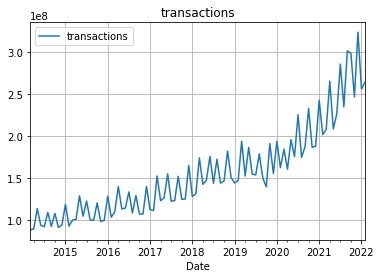

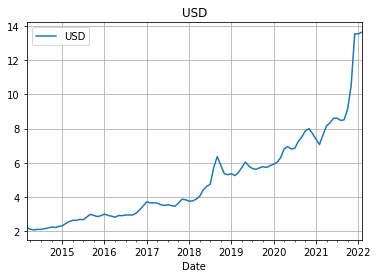

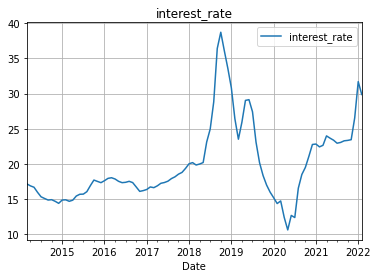

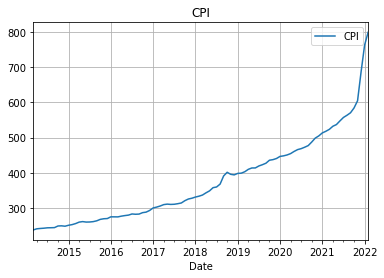

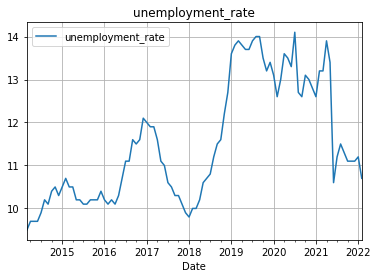

In [7]:
plotAll(inflation, x_axis_name='Date', plot_type='line')

Although having patterns distinct from each other, each of the measures appears to have a positive trend over time. Let us compute the correlations between them to get the first numerical output of the analysis.

In [8]:
inflation.corr()

,transactions,USD,interest_rate,CPI,unemployment_rate
transactions,1.000000,0.905112,0.427742,0.912421,0.434932
USD,0.905112,1.000000,0.510716,0.990095,0.484971
interest_rate,0.427742,0.510716,1.000000,0.490140,0.255460
CPI,0.912421,0.990095,0.490140,1.000000,0.514235
unemployment_rate,0.434932,0.484971,0.255460,0.514235,1.000000


There are high positive correlations between transactions-USD, transactions-CPI, USD-CPI, and moderate positive correlations between USD-interest_rate, CPI-unemployment_rate. While the results for transactions-CPI and USD-CPI are consistent with the statements prior to the analytical analysis, the others are unexpected. One thing that needs to be paid attention to is that, as mentioned above, all of the measures have some significant amount of trend towards the same diretion. So correlations that are seen may be due to this trend phenomenon. In order to see the relationships between the measures without the trend effect, let us adjust the data accordingly using the numpy.diff function.

In [9]:
inflation_trend_adjusted = pd.DataFrame({col: np.diff(inflation[col],  n=1) for col in inflation.columns if col != 'Date'})
inflation_trend_adjusted

,transactions,USD,interest_rate,CPI,unemployment_rate
0,1150615,-0.09,-0.28,3.19,0.2
1,24246591,-0.04,-0.19,0.95,0.0
2,-19877168,0.03,-0.72,0.75,0.0
3,-1634411,0.00,-0.64,1.10,0.2
4,16984426,0.04,-0.24,0.23,0.3
...,...,...,...,...,...
90,-2874129,0.63,0.06,13.66,-0.2
91,-52101351,1.38,0.10,20.52,0.0
92,77177943,3.01,3.10,82.11,0.0
93,-67694714,-0.01,5.16,76.28,0.1


In [10]:
inflation_trend_adjusted.corr()

,transactions,USD,interest_rate,CPI,unemployment_rate
transactions,1.000000,0.129979,-0.111149,0.017706,0.105341
USD,0.129979,1.000000,0.317478,0.610047,-0.022284
interest_rate,-0.111149,0.317478,1.000000,0.410987,-0.106492
CPI,0.017706,0.610047,0.410987,1.000000,-0.054377
unemployment_rate,0.105341,-0.022284,-0.106492,-0.054377,1.000000


See both of trend-included and trend-adjusted correlations on heatmaps.

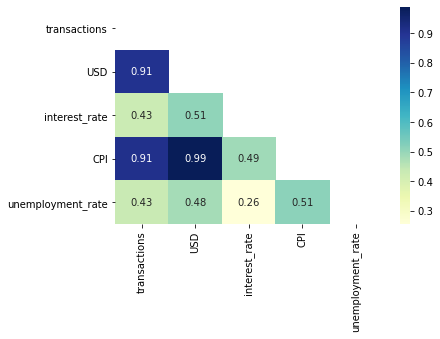

In [11]:
mask = np.triu(np.ones_like(inflation.corr()))
dataplot_inflation = sns.heatmap(inflation.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

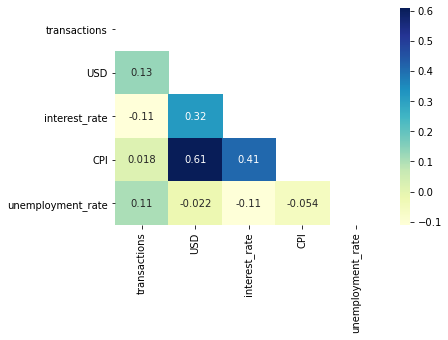

In [12]:
mask = np.triu(np.ones_like(inflation_trend_adjusted.corr()))
dataplot_inflation_trend_adjusted = sns.heatmap(inflation_trend_adjusted.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

After the adjustment of the trend effect, almost all of the correlation values converged to zero. Which is also surprising but at least more reasonable. Now the only pair that may be considered as -somehow to some extent significantly- correlated are USD-CPI. This is reasonable due to the aforementioned argument. The costs of the products depend strongly on the USD, which makes their prices dependent on the USD/TRY exchange rate. 

However, all the other hypotheses seem to have been challenged. CPI and transactions were expected to have a positive correlation. While they seem to be highly correlated in the trend-included computation, they have almost no correlation at all after the trend adjustment. This may call for an additional and more advanced analysis.

The consumption (transactions) and interest rates were expected to be negatively correlated. Their trend adjusted values are negatively correlated, but the amount is so slight that it would not be wise to conclude this hypothesis to be confirmed by the data in hand. As also mentioned in the introduction, it was already doubtful that the amount of their correlation would be great, for the consumption data are from spendings that are small in amount.

Finally, the unemployment rate and the inflation (CPI) turned out to be uncorrelated in the trend-adjusted calculation and moderately correlated in the trend-included one. Both of the two results are unexpected for the hypothesis. The latter is worse than being irrelevant, it is contrary to what we would expect under the hypothesis. 

Unable to find what is expected, let us investigate the Google Trends Data.



# Google Trends Data

In [13]:
interest_search = pd.read_csv('google_search_faiz.csv', sep=';')
interest_search.head()

,Kategori: Tüm kategoriler
0,"Ay,faiz oranı: (Türkiye)"
1,"2014-01,15"
2,"2014-02,13"
3,"2014-03,10"
4,"2014-04,12"


The structure of the data is somehow strange. The two sets (date, and the amount of searches) of information that need to be carried are merged in one column. So this needs to be handled.

In [14]:
def partitionString(df, colID, newColName):
    date, col = [], []
    for i in range(len(df)):
        date.append(df.iloc[i, colID].split(',')[0])
        col.append(df.iloc[i, colID].split(',')[1])
    df['Date'], df[newColName] = date, col
    df = df.drop(df.columns[colID], axis = 1)
    return df
    
interest_search = partitionString(interest_search, 0, 'number_of_searchs_interest')
interest_search.head()

,Date,number_of_searchs_interest
0,Ay,faiz oranı: (Türkiye)
1,2014-01,15
2,2014-02,13
3,2014-03,10
4,2014-04,12


After that, let us check the data types of the columns, whether there are rows with no information.

In [15]:
interest_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        100 non-null    object
 1   number_of_searchs_interest  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


Apply the necessary adjustments and formattings.

In [16]:
interest_search['number_of_searchs_interest'] = pd.to_numeric(interest_search['number_of_searchs_interest'], errors='coerce')
interest_search['Date'] = pd.to_datetime(interest_search['Date'], errors="coerce", format="%Y-%m")
interest_search = interest_search.dropna()
interest_search = interest_search.sort_values('Date', ascending=True)
interest_search['number_of_searchs_interest'] = interest_search['number_of_searchs_interest'].astype('int')
print(interest_search.info())
interest_search

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        99 non-null     datetime64[ns]
 1   number_of_searchs_interest  99 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.9 KB
None


,Date,number_of_searchs_interest
1,2014-01-01,15
2,2014-02-01,13
3,2014-03-01,10
4,2014-04-01,12
5,2014-05-01,12
...,...,...
95,2021-11-01,41
96,2021-12-01,46
97,2022-01-01,37
98,2022-02-01,29


The same operations are required for the "dollar search" data too.

In [17]:
dollar_search = pd.read_csv('google_search_dolar.csv', sep=';')
dollar_search.head()

,Kategori: Tüm kategoriler
0,"Ay,dolar: (Türkiye)"
1,"2014-01,1"
2,"2014-02,1"
3,"2014-03,1"
4,"2014-04,1"


In [18]:
dollar_search = partitionString(dollar_search, 0, 'number_of_searchs_dollar')
dollar_search['number_of_searchs_dollar'] = pd.to_numeric(dollar_search['number_of_searchs_dollar'], errors='coerce')
dollar_search['Date'] = pd.to_datetime(dollar_search['Date'], errors="coerce", format="%Y-%m")
dollar_search = dollar_search.dropna()
dollar_search = dollar_search.sort_values('Date', ascending=True)
dollar_search['number_of_searchs_dollar'] = dollar_search['number_of_searchs_dollar'].astype('int')
print(dollar_search.info())
dollar_search

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      99 non-null     datetime64[ns]
 1   number_of_searchs_dollar  99 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.9 KB
None


,Date,number_of_searchs_dollar
1,2014-01-01,1
2,2014-02-01,1
3,2014-03-01,1
4,2014-04-01,1
5,2014-05-01,1
...,...,...
95,2021-11-01,54
96,2021-12-01,100
97,2022-01-01,37
98,2022-02-01,24


Now that the both data are cleaned, let us check whether there are any conflicts between their time columns. If there are, they also need to be handled for the two datasets to be merged.

In [19]:
match = interest_search['Date'] == dollar_search['Date']
sum(match) == len(match)

True

It seems there is no problem, so the merge can be done safely.

In [20]:
search = interest_search.copy()
search['number_of_searchs_dollar'] = dollar_search['number_of_searchs_dollar']
search = search.reset_index(drop=True)
print(search.info())
search

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        99 non-null     datetime64[ns]
 1   number_of_searchs_interest  99 non-null     int32         
 2   number_of_searchs_dollar    99 non-null     int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 1.7 KB
None


,Date,number_of_searchs_interest,number_of_searchs_dollar
0,2014-01-01,15,1
1,2014-02-01,13,1
2,2014-03-01,10,1
3,2014-04-01,12,1
4,2014-05-01,12,1
...,...,...,...
94,2021-11-01,41,54
95,2021-12-01,46,100
96,2022-01-01,37,37
97,2022-02-01,29,24


Plot the data.

<Figure size 432x288 with 0 Axes>

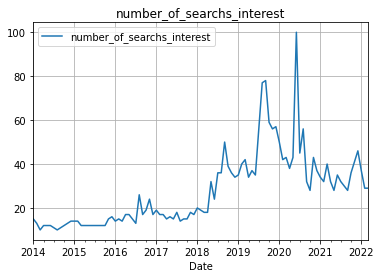

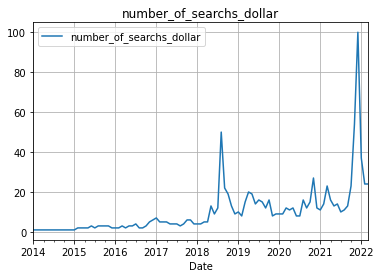

In [21]:
plotAll(search, x_axis_name='Date', plot_type='line')

<Figure size 432x288 with 0 Axes>

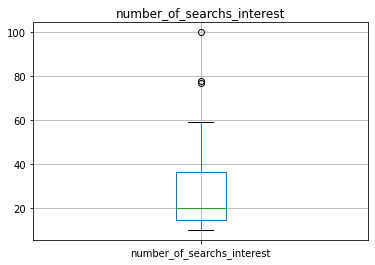

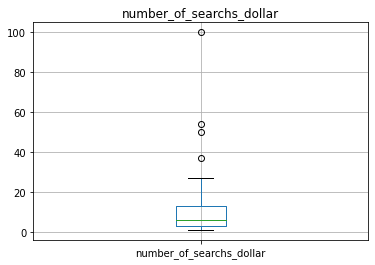

In [22]:
plotAll(search, x_axis_name='Date', plot_type='box')

See the correlation. Prior to the output, it can be said that there is no apparent reason to expect a high correlation between the two.

In [23]:
search.corr()

,number_of_searchs_interest,number_of_searchs_dollar
number_of_searchs_interest,1.000000,0.443913
number_of_searchs_dollar,0.443913,1.000000


Now it is the time for mergeing the EVDS and Google Trends data. As their time horizons differ from each other, they need to be taken into the same time horizon.

In [24]:
earliest = min(inflation.iloc[0]['Date'], search.iloc[0]['Date'])
latest = max(inflation.iloc[len(inflation)-1]['Date'], search.iloc[len(search)-1]['Date'])

data = inflation.copy()
data['interest_search'] = search[(search['Date']>=earliest)&(search['Date']<=latest)]['number_of_searchs_interest']
data['dollar_search'] = search[(search['Date']>=earliest)&(search['Date']<=latest)]['number_of_searchs_dollar']
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               96 non-null     datetime64[ns]
 1   transactions       96 non-null     int32         
 2   USD                96 non-null     float64       
 3   interest_rate      96 non-null     float64       
 4   CPI                96 non-null     float64       
 5   unemployment_rate  96 non-null     float64       
 6   interest_search    96 non-null     int32         
 7   dollar_search      96 non-null     int32         
dtypes: datetime64[ns](1), float64(4), int32(3)
memory usage: 5.0 KB
None


,Date,transactions,USD,interest_rate,CPI,unemployment_rate,interest_search,dollar_search
0,2014-03-01,88442695,2.22,17.15,237.18,9.5,15,1
1,2014-04-01,89593310,2.13,16.87,240.37,9.7,13,1
2,2014-05-01,113839901,2.09,16.68,241.32,9.7,10,1
3,2014-06-01,93962733,2.12,15.96,242.07,9.7,12,1
4,2014-07-01,92328322,2.12,15.32,243.17,9.9,12,1
...,...,...,...,...,...,...,...,...
91,2021-10-01,298875941,9.14,23.34,584.32,11.1,30,11
92,2021-11-01,246774590,10.52,23.44,604.84,11.1,28,13
93,2021-12-01,323952533,13.53,26.54,686.95,11.1,36,23
94,2022-01-01,256257819,13.52,31.70,763.23,11.2,41,54


Check the correlations.

In [25]:
data.corr()

,transactions,USD,interest_rate,CPI,unemployment_rate,interest_search,dollar_search
transactions,1.000000,0.905112,0.427742,0.912421,0.434932,0.523811,0.549141
USD,0.905112,1.000000,0.510716,0.990095,0.484971,0.614834,0.727648
interest_rate,0.427742,0.510716,1.000000,0.490140,0.255460,0.267947,0.601658
CPI,0.912421,0.990095,0.490140,1.000000,0.514235,0.642750,0.734052
unemployment_rate,0.434932,0.484971,0.255460,0.514235,1.000000,0.729162,0.285452
interest_search,0.523811,0.614834,0.267947,0.642750,0.729162,1.000000,0.446340
dollar_search,0.549141,0.727648,0.601658,0.734052,0.285452,0.446340,1.000000


As mentioned before, what is expected is the positive correlations between not dollar_search and USD but dollar_search and sharp changes in USD (same is true for interest_search and interest_rate). But before the analysis of this, one may pay attention to the high correlations of interest_rate-dollar_search, CPI-interest_search, CPI-dollar_search, unemployment_rate-interest_search and USD-dollar_search. The last one is relatively high already. One can also think that it is expected to see a positive correlation between unemployment_rate and interest_search as unumployment is possibly conducive to a need for loans. 

Now let us add two columns -one for the changes in the USD/TRY exchange rates and the other for the changes in the interest rates- to see whether they are really correlated with the amount of searchings in the Google search engine.

In [26]:
change_vs_search = data[['Date', 'interest_search', 'dollar_search']][1:]
change_vs_search['USD_change'] = abs(np.diff(data['USD'], n=1))
change_vs_search['interest_change'] = abs(np.diff(data['interest_rate'], n=1))
change_vs_search.head()

,Date,interest_search,dollar_search,USD_change,interest_change
1,2014-04-01,13,1,0.09,0.28
2,2014-05-01,10,1,0.04,0.19
3,2014-06-01,12,1,0.03,0.72
4,2014-07-01,12,1,0.00,0.64
5,2014-08-01,12,1,0.04,0.24


<Figure size 432x288 with 0 Axes>

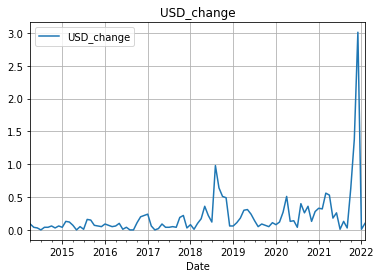

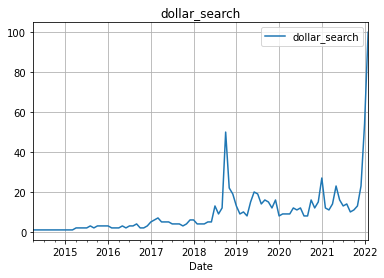

In [27]:
plotAll(change_vs_search[['Date', 'USD_change', 'dollar_search']], x_axis_name='Date', plot_type='line')

<Figure size 432x288 with 0 Axes>

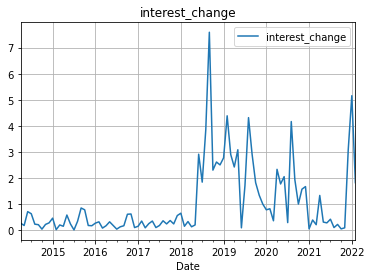

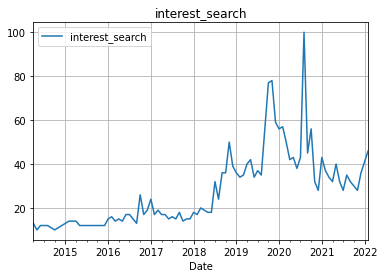

In [28]:
plotAll(change_vs_search[['Date', 'interest_change', 'interest_search']], x_axis_name='Date', plot_type='line')

It seems that there are some overlapping in the ups and downs of the above pairs, especially for the dollar plots. Seeing them on the same plot might be more informative.

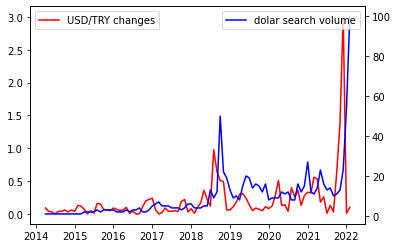

In [29]:
fig, ax = plt.subplots(1, 1)
usd, usd_search, time = np.array(change_vs_search['USD_change']), np.array(change_vs_search['dollar_search']), np.array(change_vs_search['Date'])
ax.plot(time, usd, 'r', label="USD/TRY changes")
plt.legend(loc="upper left")
ax2 = ax.twinx()
ax2.plot(time, usd_search, 'b', label="dolar search volume")
plt.legend(loc="upper right")
plt.draw()

In [30]:
change_vs_search.corr()

,interest_search,dollar_search,USD_change,interest_change
interest_search,1.000000,0.443475,0.189929,0.487642
dollar_search,0.443475,1.000000,0.186091,0.373097
USD_change,0.189929,0.186091,1.000000,0.289536
interest_change,0.487642,0.373097,0.289536,1.000000


While there seems to be some correlation according to the plots, the numerical computation is not compatible with this observation. Of course, there may be some bias that calls for further analysis. 

Let us finally see the correlations on a heatmap.

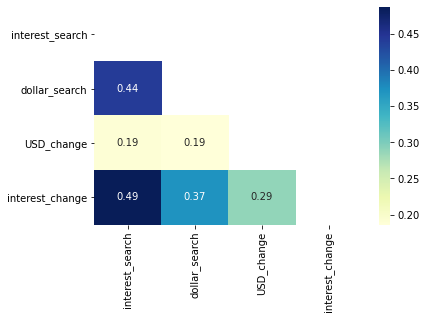

In [31]:
mask = np.triu(np.ones_like(change_vs_search.corr()))
dataplot_search = sns.heatmap(change_vs_search.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

# Conclusion

Wrapping up, it was speculated that there are some relationships between the individual consumption, USD/TRY exchange rates, interest rates and unemployment rates and the inflation. Although none of the conclusions in this work are decisive, after the analysis on the EVDS data, only the possibility that an increase in the USD/TRY exchange rate causes the inflation is supported. The analysis on the Google Trends data gave plots that are promising for the idea that the search volumes of “dolar”, “faiz oranı” and sharp changes in their respective measurements are correlated. However, the calculated correlations were not sufficient to conclude this idea to be the case. Of course, this latter analysis additionally depends on the choice of the words to analyze. Maybe some other words would have appeared to have higher correlations with the relevant measurements in this work. At this point, there remains some further analysis for the Google Trends data and the measurements in the EVDS data that were expected to have a relationship with the inflation.